In [21]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [22]:
# Download latest version
path = kagglehub.dataset_download("altavish/boston-housing-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\rafae\.cache\kagglehub\datasets\altavish\boston-housing-dataset\versions\1


In [23]:

print("Arquivos no diretório baixado:", os.listdir(path))

csv_path = os.path.join(path, "HousingData.csv")

df = pd.read_csv(csv_path)

# Mostrar as primeiras linhas do dataset
print("Primeiras 5 linhas do dataset:")
display(df.head())




Arquivos no diretório baixado: ['HousingData.csv']
Primeiras 5 linhas do dataset:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


Aqui está uma tabela descritiva de cada abreviação das colunas:

<small>

**CRIM** - taxa de criminalidade per capita por cidade<br>
**ZN** - proporção de terrenos residenciais zoneados para lotes com mais de 2.300 m²<br>
**INDUS** - proporção de hectares não comerciais por cidade<br>
**CHAS** - variável fictícia do Rio Charles (1 se o trato limita o rio; 0 caso contrário)<br>
**NOX** - concentração de óxidos nítricos (partes por 10 milhões)<br>
**RM** - número médio de cômodos por moradia<br>
**AGE** - proporção de unidades ocupadas pelos proprietários construídas antes de 1940<br>
**DIS** - distâncias ponderadas para cinco centros de emprego de Boston<br>
**RAD** - índice de acessibilidade a rodovias radiais<br>
**TAX** - taxa de imposto sobre a propriedade do valor integral por US$ 10.000<br>
**PTRATIO** - proporção aluno-professor por cidade<br>
**B** - 1000(Bk - 0,63)^2 onde Bk é a proporção de negros por cidade<br>
**LSTAT** - % de status inferior da população<br>
**MEDV** - valor médio de casas ocupadas pelos proprietários em milhares de dólares

</small>



In [24]:
# Mostrar informações sobre o dataset
print("\nInformações do dataset:")
display(df.info())




Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


None

In [25]:
# Verificar dados nulos
print("\nNúmero de valores nulos por coluna:")
print(df.isnull().sum())


Número de valores nulos por coluna:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


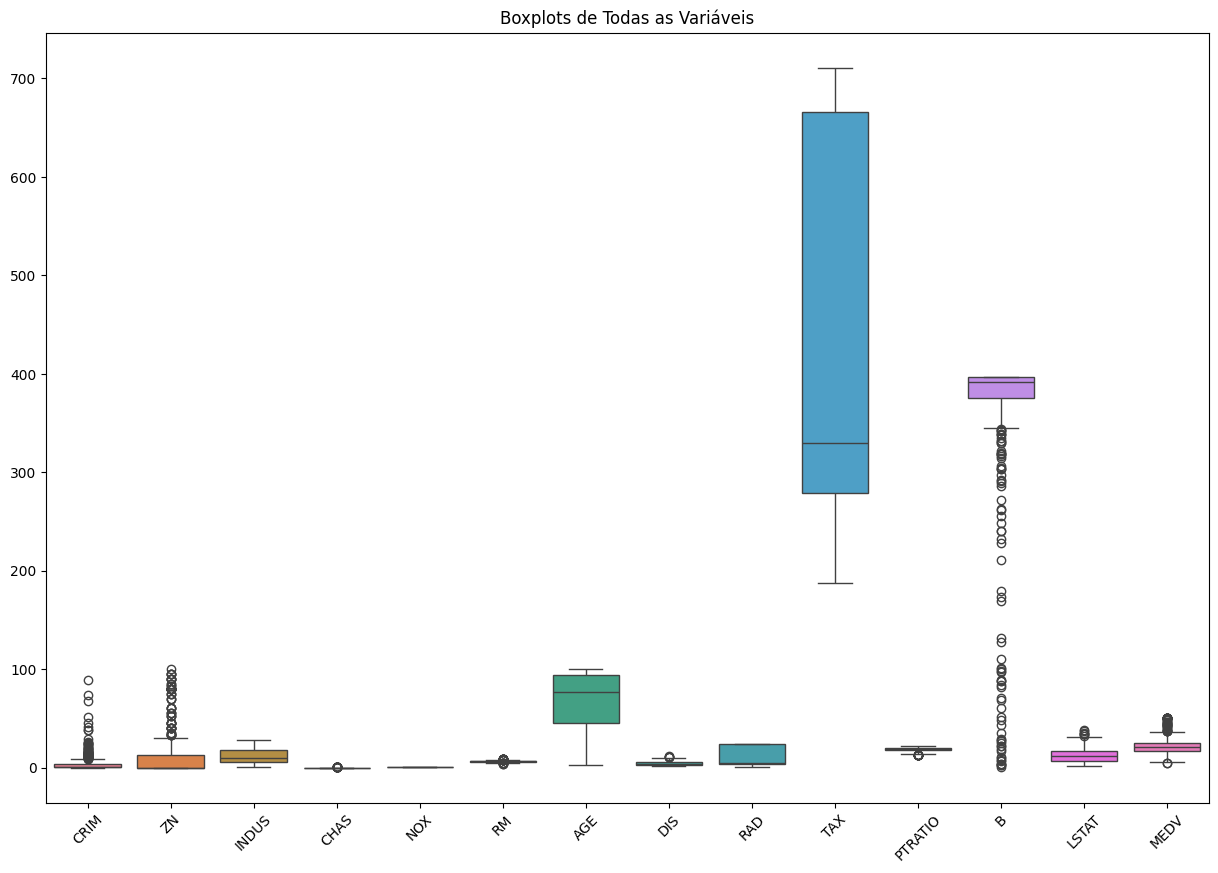


Detecção de Outliers:
--------------------------------------------------

CRIM:
Número de outliers: 65
Limites: [-5.14, 8.78]
Valores dos outliers: [ 8.98296 13.5222   9.2323  11.1081  18.4982  19.6091  15.288    9.82349
 23.6482  17.8667  88.9762  15.8744   9.18702 20.0849  16.8118  24.3938
 22.5971  14.3337  11.5779  38.3518   9.91655 25.0461  14.2362   9.59571
 24.8017  41.5292  67.9208  20.7162  11.9511  51.1358  14.0507  18.811
 28.6558  45.7461  18.0846  10.8342  25.9406  73.5341  11.8123  11.0874
 12.0482   8.79212 15.8603  37.6619   9.33889 10.0623  13.9134  11.1604
 14.4208  15.1772  13.6781   9.39063 22.0511   9.72418  9.96654 12.8023
 10.6718   9.92485  9.32909  9.51363 15.5757  13.0751  15.0234  10.233
 14.3337 ]

ZN:
Número de outliers: 63
Limites: [-18.75, 31.25]
Valores dos outliers: [ 75.   75.   75.   90.   85.  100.   80.   80.   45.   45.   45.   45.
  45.   45.   60.   60.   80.   80.   80.   80.   95.   95.   82.5  82.5
  95.   95.   80.   80.   90.   40.   40.   

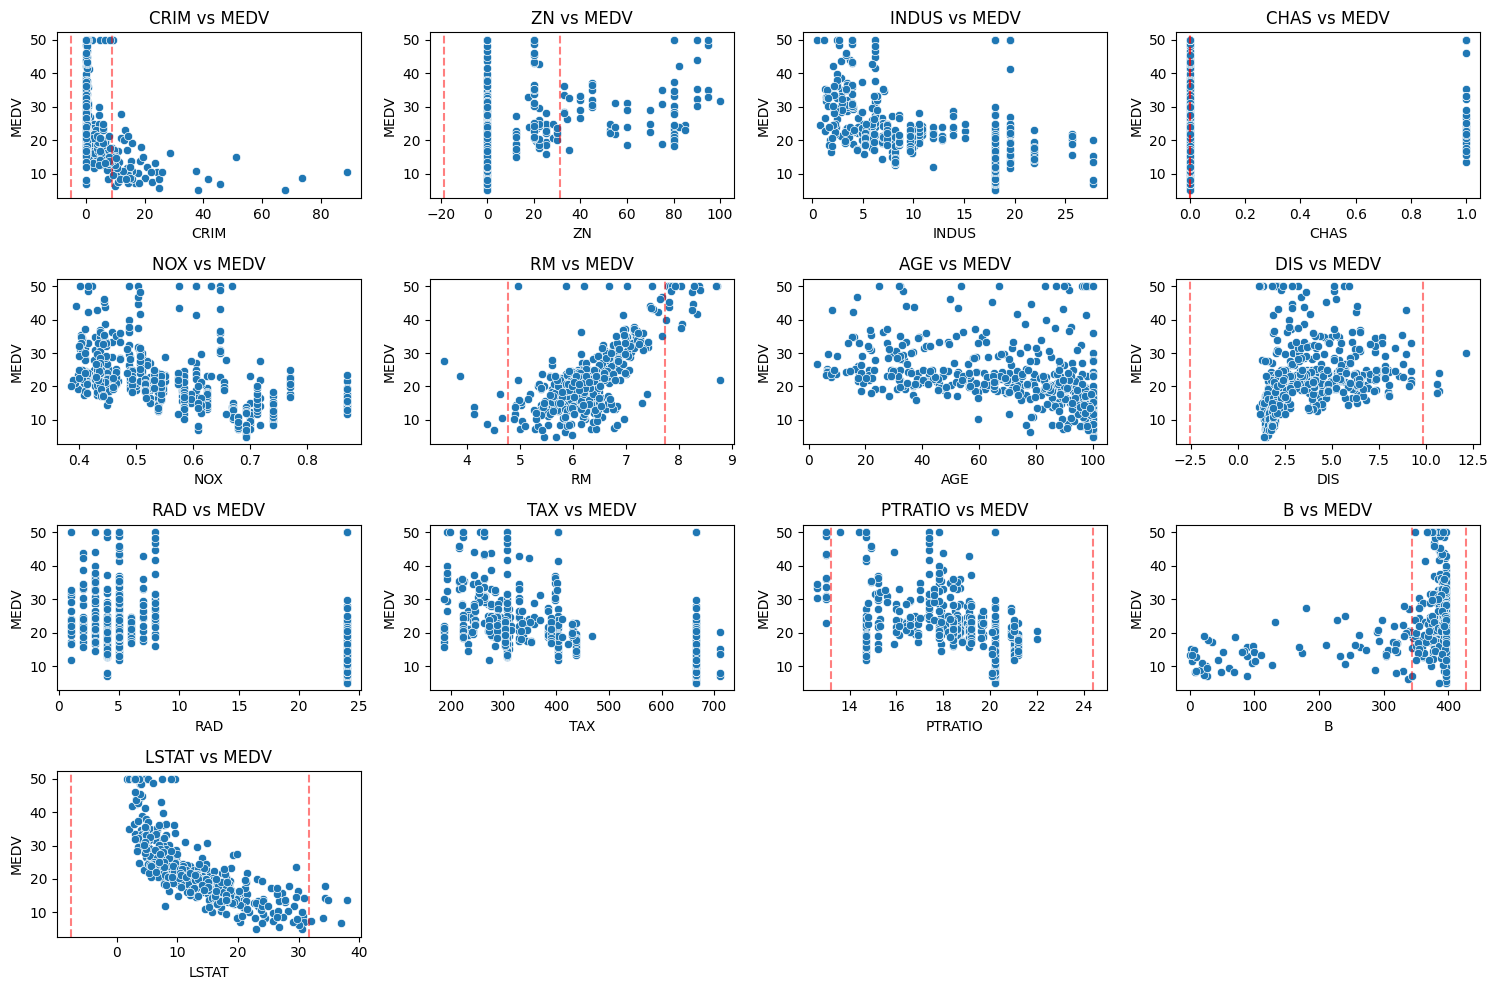

In [26]:
# Função para detectar outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound

# Criar boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplots de Todas as Variáveis')
plt.show()

# Detectar e mostrar outliers
print("\nDetecção de Outliers:")
print("-" * 50)

for column in df.columns:
    outliers, lower_bound, upper_bound = detect_outliers(df, column)
    if len(outliers) > 0:
        print(f"\n{column}:")
        print(f"Número de outliers: {len(outliers)}")
        print(f"Limites: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print(f"Valores dos outliers: {outliers.values}")

# Visualizar outliers em relação à variável alvo (MEDV)
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 4, i)
    sns.scatterplot(data=df, x=column, y='MEDV')
    outliers, lower_bound, upper_bound = detect_outliers(df, column)
    if len(outliers) > 0:
        plt.axvline(x=lower_bound, color='r', linestyle='--', alpha=0.5)
        plt.axvline(x=upper_bound, color='r', linestyle='--', alpha=0.5)
    plt.title(f'{column} vs MEDV')

plt.tight_layout()
plt.show()

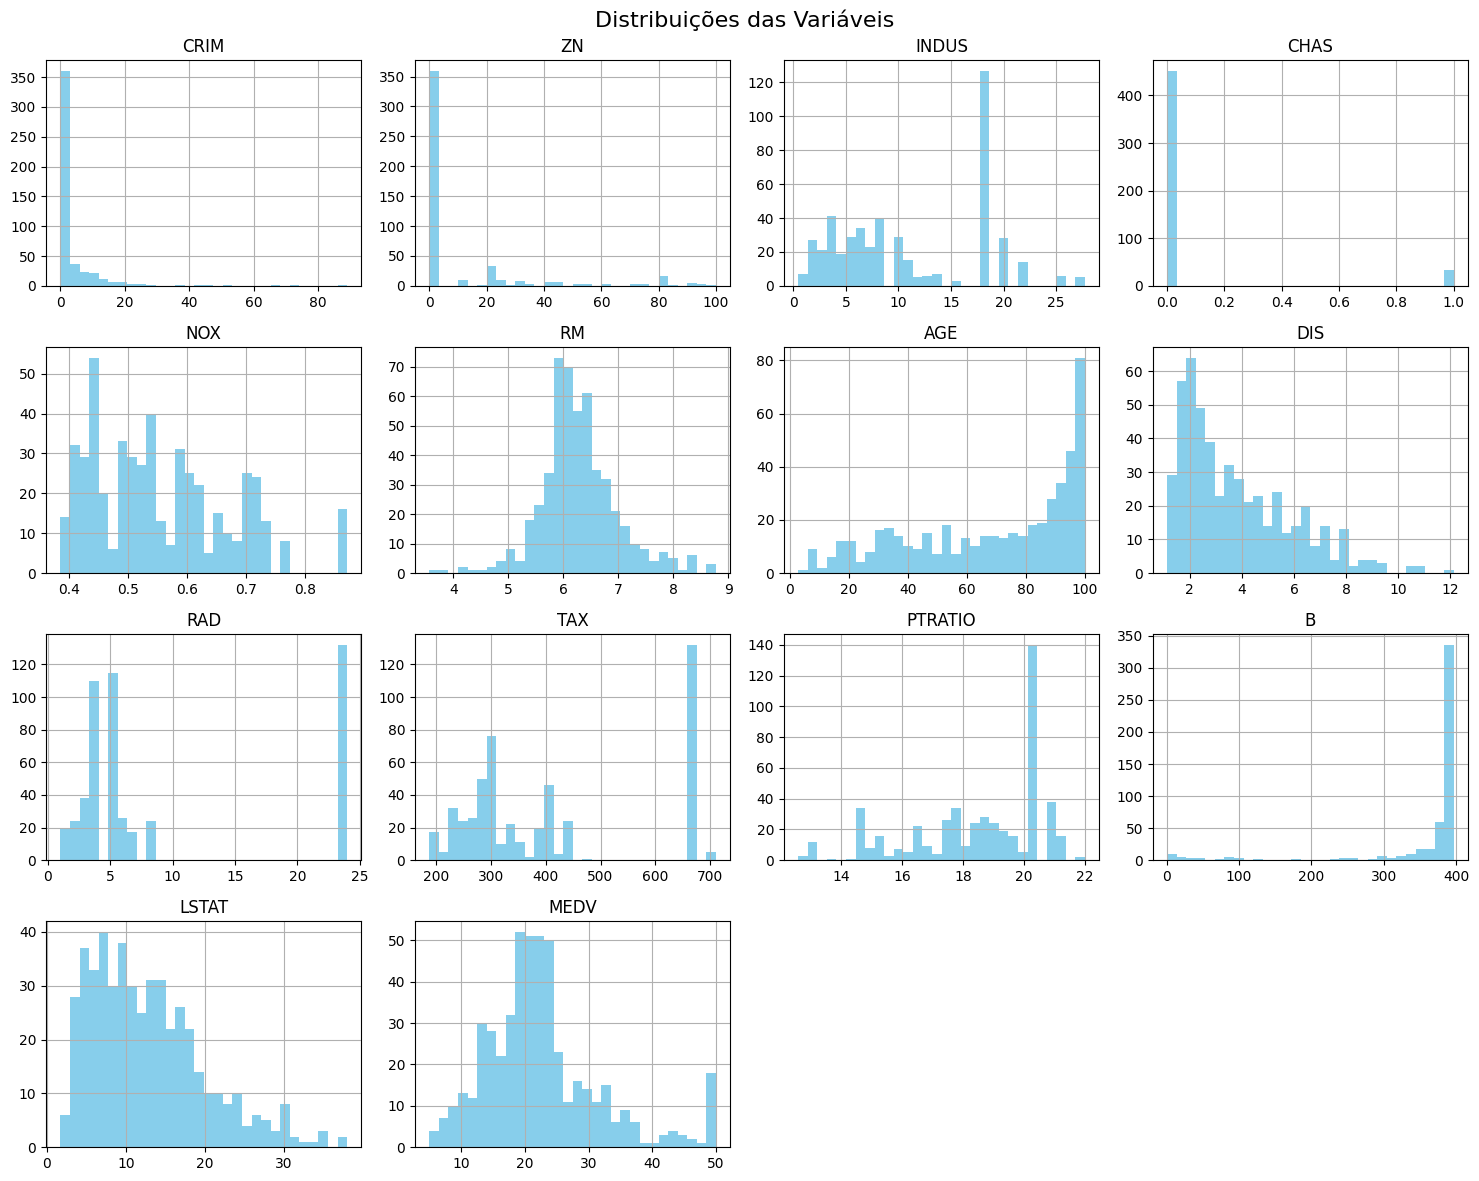

In [27]:
df.hist(bins=30, figsize=(15, 12), color='skyblue')
plt.suptitle("Distribuições das Variáveis", fontsize=16)
plt.tight_layout()
plt.show()

# eixo x = faixas de valores
# eixo y = número de registros (quantas vezes esses valores aparecem)

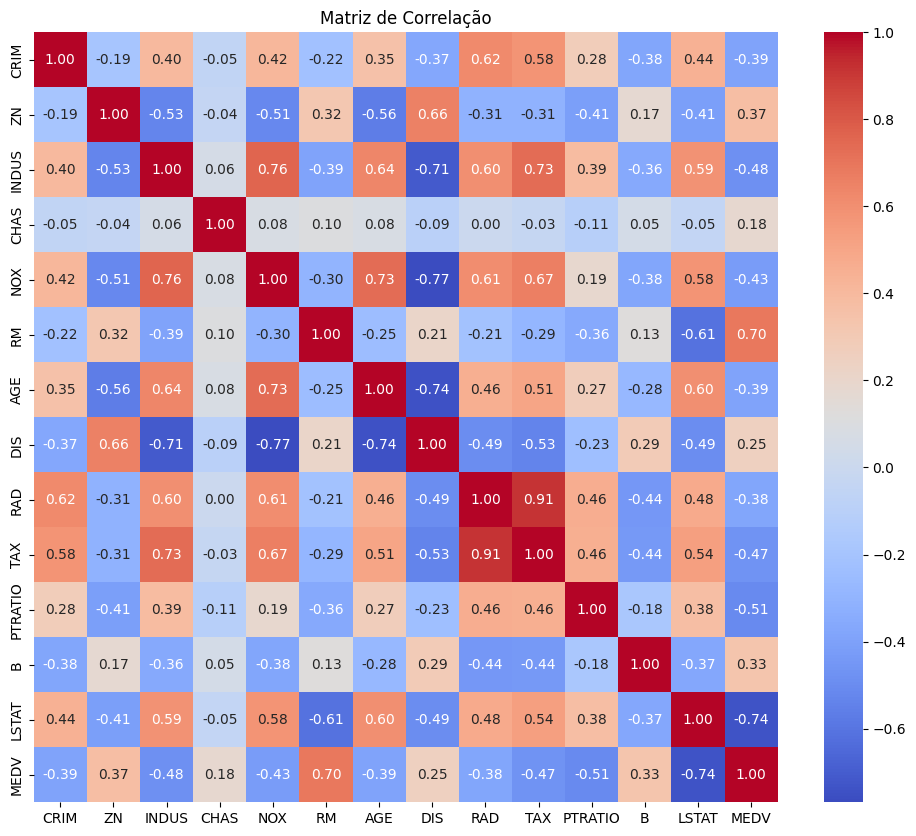

In [28]:
# 5. Matriz de correlação
correlation = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

<font color="red">Aplicar o KNN apenas apos normalizar os dados</font>
--Knn e sensivel a escala de variaveis




Para preencher os dados nulos optei por usar KNN, pois o preço do imóvel depende das variáveis relacionadas e o KNN considera essas relações ao preencher valores nulos, e é mais preciso que métodos simples como média ou mediana.

In [29]:
from sklearn.impute import KNNImputer

# Abordagem mais simples
print("Antes do tratamento:")
print(df.isnull().sum())

# Aplicar tratamento
imputer = KNNImputer(n_neighbors=5)
df_tratado = pd.DataFrame(
    imputer.fit_transform(df),
    columns=df.columns
)

print("\nDepois do tratamento:")
print(df_tratado.isnull().sum())

# Verificar algumas linhas específicas
print("\nExemplo de linhas com valores ausentes:")
linhas_com_nulos = df[df.isnull().any(axis=1)]
print("\nAntes:")
print(linhas_com_nulos.head())
print("\nDepois:")
print(df_tratado.loc[linhas_com_nulos.index].head())

ModuleNotFoundError: No module named 'sklearn'